# Assignment 4 - CNN
Author: Soham Vaishnav\
Roll No.: 2022112002

## Importing required libraries

In [1]:
import numpy as np
from plotly import express as px
from plotly import subplots as sp
from plotly import graph_objects as go
from matplotlib import pyplot as plt
import pandas as pd
import sys
import os
import wandb

import cv2

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torch.utils.data import random_split
from torch.utils.data import DataLoader

import torchvision.transforms as transforms

## Setting up paths

In [2]:

AssignDIR = os.path.dirname(os.path.dirname(os.path.abspath('CNN.ipynb')))
CurrDIR = os.path.dirname(os.path.abspath('CNN.ipynb'))
UserDIR = os.path.dirname(AssignDIR)

sys.path.append(UserDIR)

RawDataDIR = os.path.join(UserDIR, "./data/external/")
PreProcessDIR = os.path.join(UserDIR, "./data/interim/4/")

from utils_4 import *
from models.cnn import cnn
from models.cnn import multilabel_cnn

## Dataloading

In [3]:
dataloader = MultiMNISTDataset(32)
dataloader.load_mnist_data('num_digits')

## Visualising the Dataset

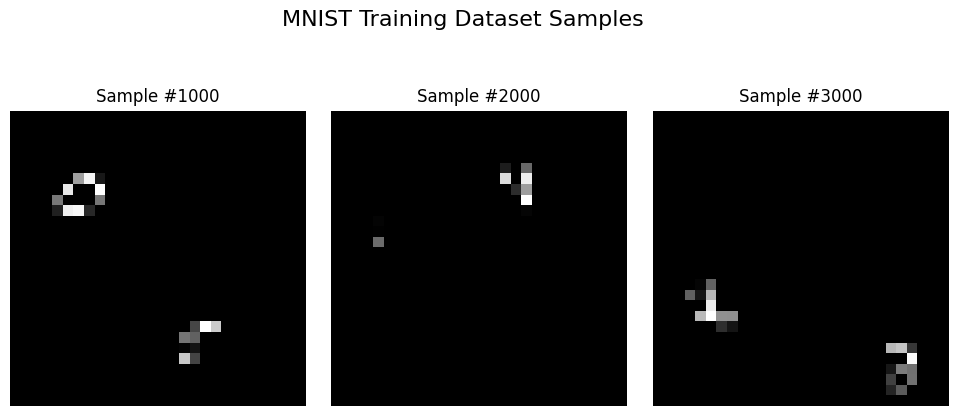

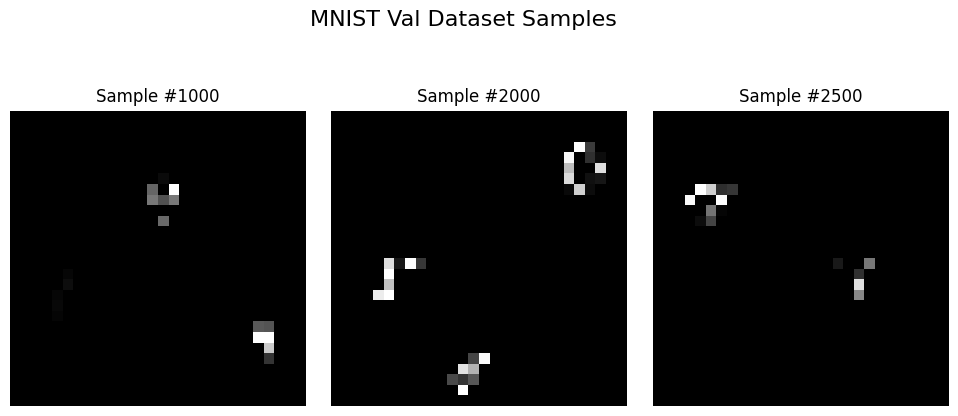

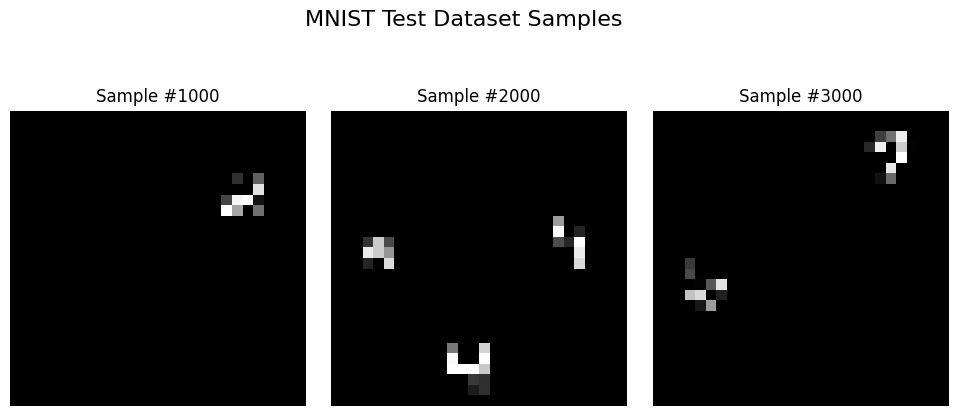

In [4]:
fig = plt.figure(figsize=(10, 5))
fig.suptitle('MNIST Training Dataset Samples', fontsize=16)
ax = plt.subplot(1, 3, 1)
plt.tight_layout()
ax.set_title('Sample #{}'.format(1000))
ax.axis('off')
plt.imshow(dataloader._train_images[1000], cmap='gray')
ax = plt.subplot(1, 3, 2)
ax.set_title('Sample #{}'.format(2000))
ax.axis('off')
plt.imshow(dataloader._train_images[2000], cmap='gray')
ax = plt.subplot(1, 3, 3)
ax.set_title('Sample #{}'.format(3000))
ax.axis('off')
plt.imshow(dataloader._train_images[3000], cmap='gray')
plt.show()

fig = plt.figure(figsize=(10, 5))
fig.suptitle('MNIST Val Dataset Samples', fontsize=16)
ax = plt.subplot(1, 3, 1)
plt.tight_layout()
ax.set_title('Sample #{}'.format(1000))
ax.axis('off')
plt.imshow(dataloader._valid_images[1000], cmap='gray')
ax = plt.subplot(1, 3, 2)
ax.set_title('Sample #{}'.format(2000))
ax.axis('off')
plt.imshow(dataloader._valid_images[2000], cmap='gray')
ax = plt.subplot(1, 3, 3)
ax.set_title('Sample #{}'.format(2500))
ax.axis('off')
plt.imshow(dataloader._valid_images[2500], cmap='gray')
plt.show()

fig = plt.figure(figsize=(10, 5))
fig.suptitle('MNIST Test Dataset Samples', fontsize=16)
ax = plt.subplot(1, 3, 1)
plt.tight_layout()
ax.set_title('Sample #{}'.format(1000))
ax.axis('off')
plt.imshow(dataloader._test_images[1000], cmap='gray')
ax = plt.subplot(1, 3, 2)
ax.set_title('Sample #{}'.format(2000))
ax.axis('off')
plt.imshow(dataloader._test_images[2000], cmap='gray')
ax = plt.subplot(1, 3, 3)
ax.set_title('Sample #{}'.format(3000))
ax.axis('off')
plt.imshow(dataloader._test_images[3000], cmap='gray')
plt.show()

In [5]:
print(dataloader._train_images[0].shape)

(28, 28)


## Initialising the model

In [2]:
config_model = {'task': [], 'in_channels': [], 'ConvLayers': [], 'FCLayers': [], 'pool': [], 
                'kernel_size': [], 'strides': [], 'activation': [], 'dropout': []}

config_trainer = {'model': [], 'loss': [], 'epochs': [], 'batch_size': [], 'learning_rate': [], 
                  'optimizer': [], 'wandb': False, 'labels': [], 'labelsRnum': True, 'FM_Vis': False}

## Running the Model - Task 2.2

### Classification

In [1]:
config_model['task'] = 'classification'
config_model['in_channels'] = 1
config_model['ConvLayers'] = [32, 10]
config_model['FCLayers'] = [10*28*28, 512, 4]
config_model['kernel_size'] = [3, 3, 3]
config_model['strides'] = [1, 1, 1]
config_model['pool'] = None
config_model['activation'] = 'relu'
config_model['dropout'] = 0.5

model = cnn.CNN(config_model)

config_trainer['model'] = model
config_trainer['loss'] = 'cross_entropy'
config_trainer['epochs'] = 10
config_trainer['batch_size'] = 64
config_trainer['learning_rate'] = 0.001
config_trainer['optimizer'] = optim.Adam(model.parameters(), lr=config_trainer['learning_rate'])
config_trainer['wandb'] = False
config_trainer['labels'] = dataloader.getLabels('num_digits')
config_trainer['labelsRnum'] = True

trainer = cnn.Model_trainer(config_trainer)
trainer.trainer(dataloader._train_images, dataloader._train_labels, dataloader._valid_images, dataloader._valid_labels, 10)
# trainer.evaluate(dataloader._test_images, dataloader._test_labels, True)

NameError: name 'config_model' is not defined

### Regression

In [8]:
config_model['task'] = 'regression'
config_model['in_channels'] = 1
config_model['ConvLayers'] = [32, 10]
config_model['FCLayers'] = [10*28*28, 512, 1]
config_model['kernel_size'] = [3, 3, 3]
config_model['strides'] = [1, 1, 1]
config_model['pool'] = None
config_model['activation'] = 'relu'
config_model['dropout'] = 0.5

model = cnn.CNN(config_model)

config_trainer['model'] = model
config_trainer['loss'] = 'MSE'
config_trainer['epochs'] = 10
config_trainer['batch_size'] = 64
config_trainer['learning_rate'] = 0.001
config_trainer['optimizer'] = optim.Adam(model.parameters(), lr=config_trainer['learning_rate'])
config_trainer['wandb'] = False
config_trainer['labels'] = dataloader.getLabels('num_digits')
config_trainer['labelsRnum'] = True

trainer = cnn.Model_trainer(config_trainer)
trainer.trainer(dataloader._train_images, dataloader._train_labels, dataloader._valid_images, dataloader._valid_labels, 10)

Epoch:  0
Acc =  0.5607777
Loss =  0.42985946
Acc =  0.5798347
Loss =  0.38504016
Epoch:  1
Acc =  0.61012286
Loss =  0.4168766
Acc =  0.6381554
Loss =  0.35150558
Epoch:  2
Acc =  0.65773433
Loss =  0.35273656
Acc =  0.69927806
Loss =  0.28712362
Epoch:  3
Acc =  0.6570545
Loss =  0.29060507
Acc =  0.715188
Loss =  0.23657289
Epoch:  4
Acc =  0.6832963
Loss =  0.28137606
Acc =  0.72216946
Loss =  0.23852405
Epoch:  5
Acc =  0.64406955
Loss =  0.30450946
Acc =  0.69756836
Loss =  0.25179848
Epoch:  6
Acc =  0.71317536
Loss =  0.2166722
Acc =  0.7537994
Loss =  0.18895957
Epoch:  7
Acc =  0.7369357
Loss =  0.18913904
Acc =  0.77968276
Loss =  0.17167321
Epoch:  8
Acc =  0.75046456
Loss =  0.18127333
Acc =  0.7947379
Loss =  0.1606388
Epoch:  9
Acc =  0.77769214
Loss =  0.16246931
Acc =  0.79801476
Loss =  0.14988513


## Hyperparameter Tuning - Task 2.3

### Classification

### Regression

## Feature Map Visualisation

### Classification

Epoch:  0


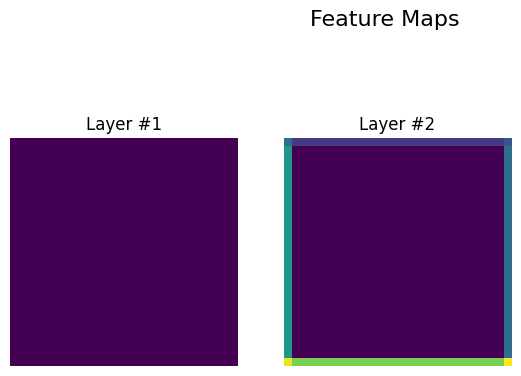

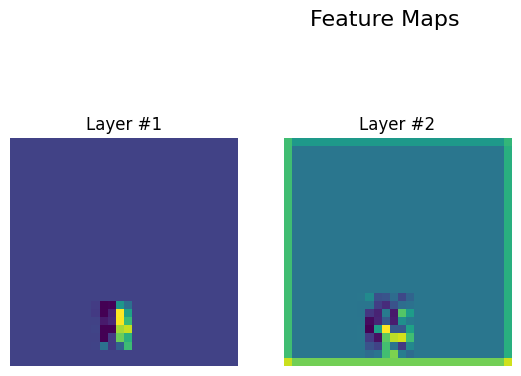

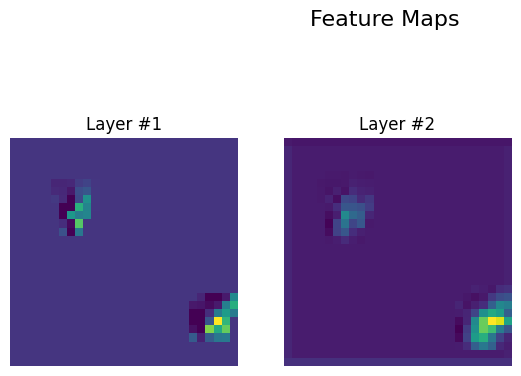

Acc =  0.7463402
Loss =  0.67567134
Acc =  0.7808226
Loss =  0.50008565
Epoch:  1


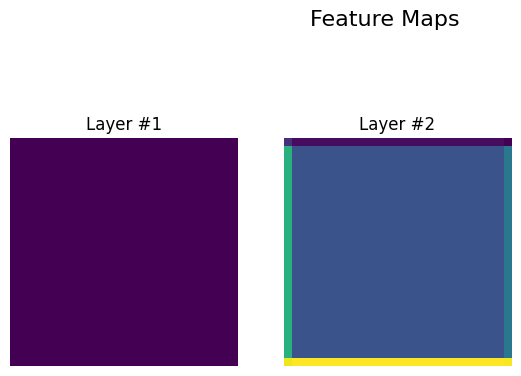

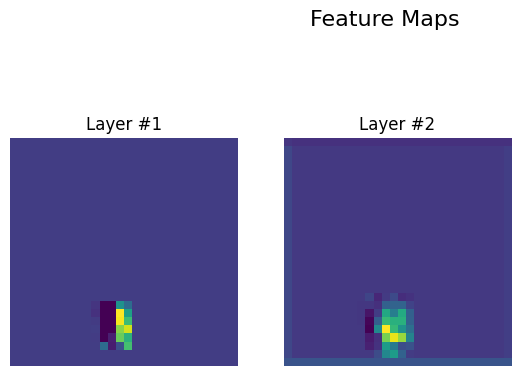

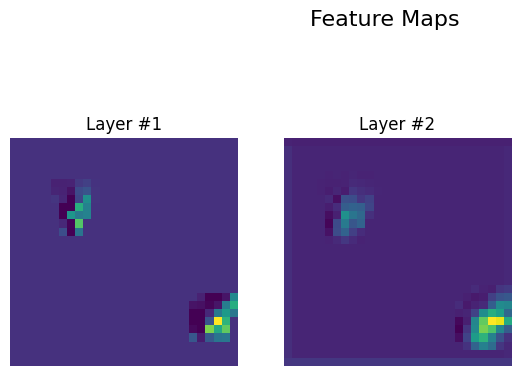

Acc =  0.75522345
Loss =  0.6608656
Acc =  0.7918883
Loss =  0.48489738
Epoch:  2


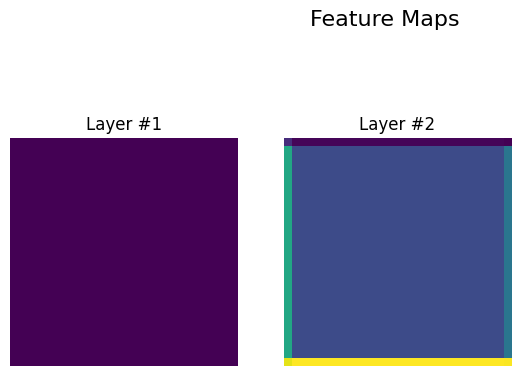

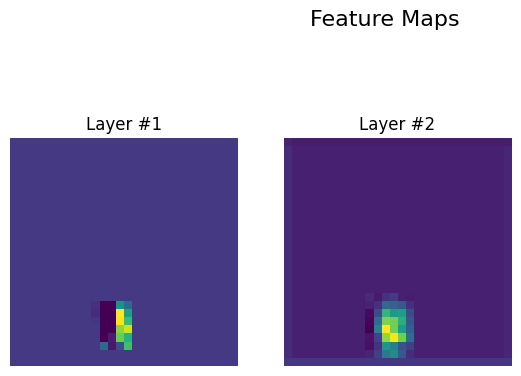

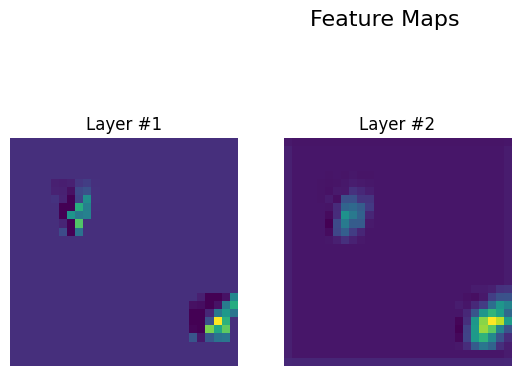

Acc =  0.81765544
Loss =  0.59634006
Acc =  0.87267286
Loss =  0.4038023
Epoch:  3


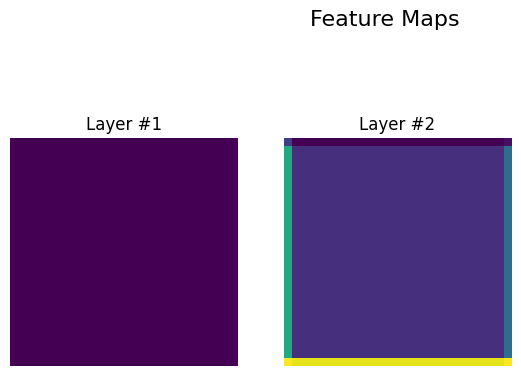

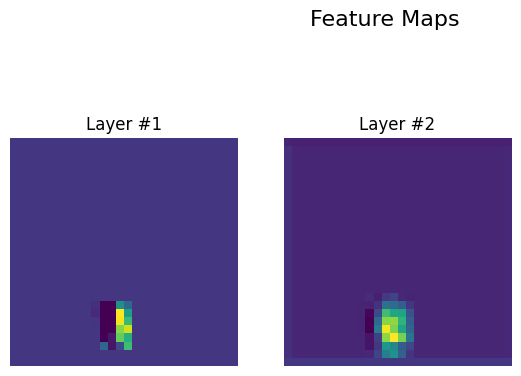

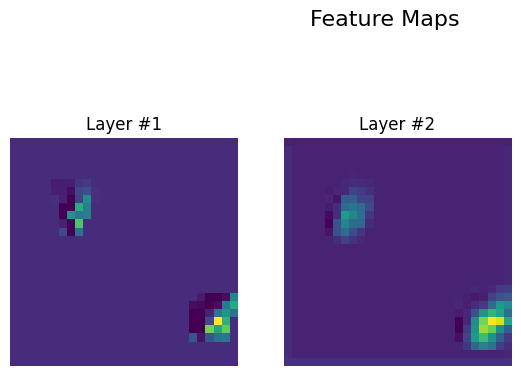

Acc =  0.85485405
Loss =  0.37608618
Acc =  0.89689404
Loss =  0.24667762
Epoch:  4


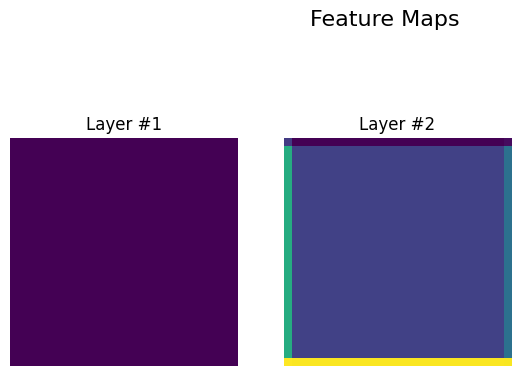

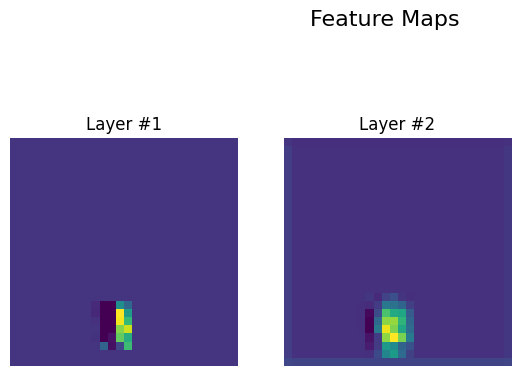

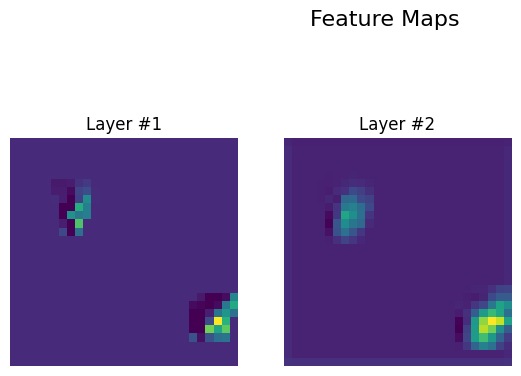

Acc =  0.90767765
Loss =  0.23252049
Acc =  0.9321334
Loss =  0.19181882
Epoch:  5


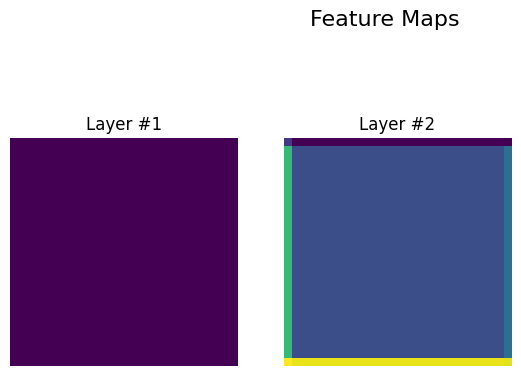

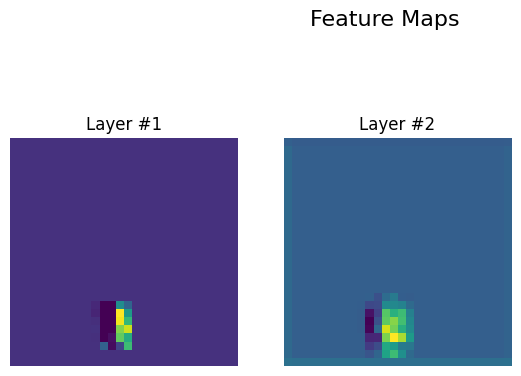

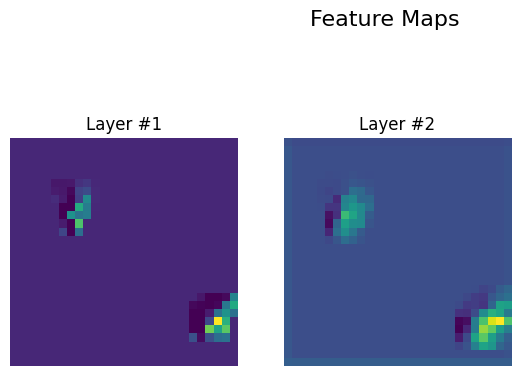

Acc =  0.9327411
Loss =  0.13390322
Acc =  0.9450988
Loss =  0.120454006
Epoch:  6


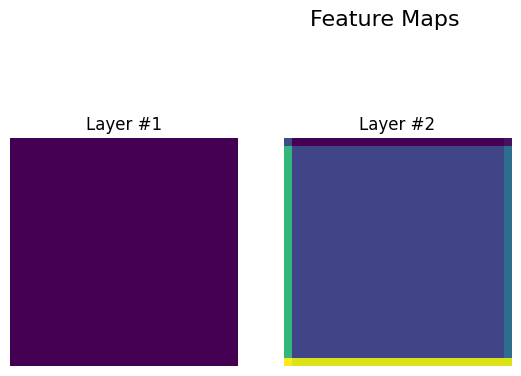

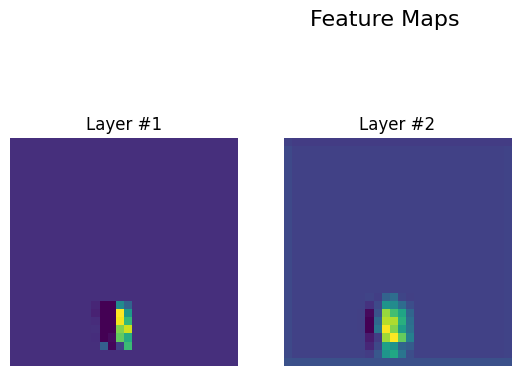

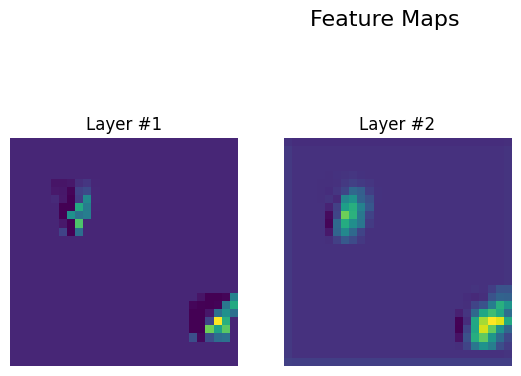

Acc =  0.9449556
Loss =  0.12773189
Acc =  0.95511967
Loss =  0.11221743
Epoch:  7


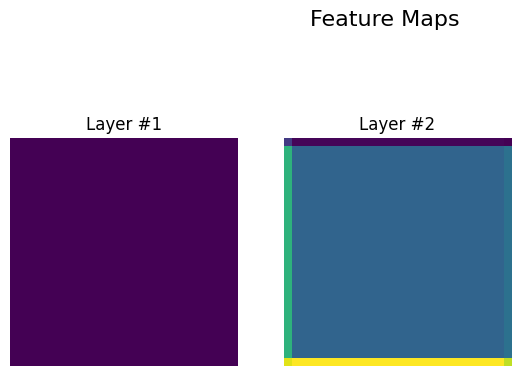

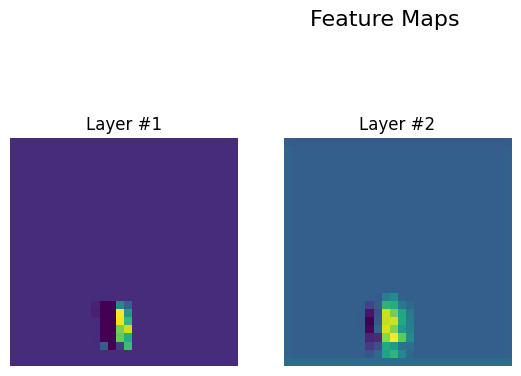

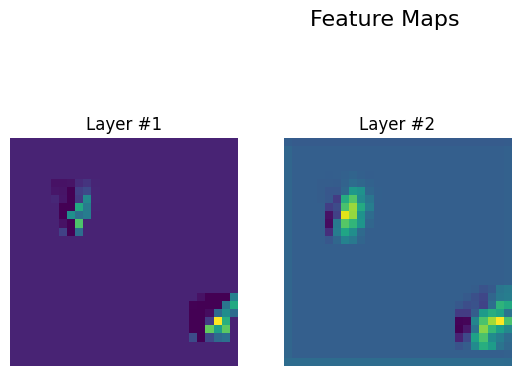

Acc =  0.96303934
Loss =  0.10158349
Acc =  0.9644282
Loss =  0.10883779
Epoch:  8


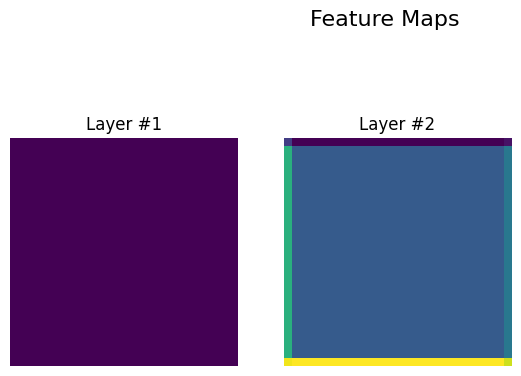

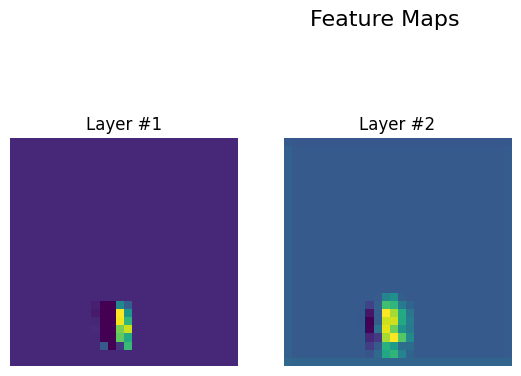

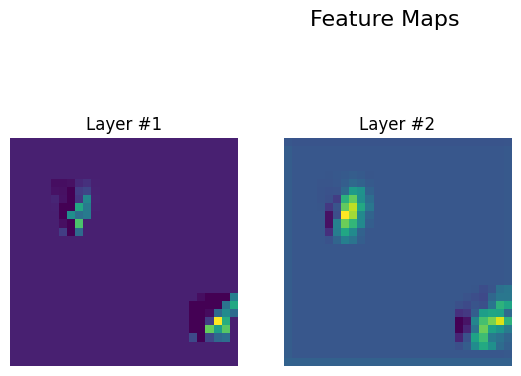

Acc =  0.9833439
Loss =  0.04835059
Acc =  0.98171544
Loss =  0.060503326
Epoch:  9


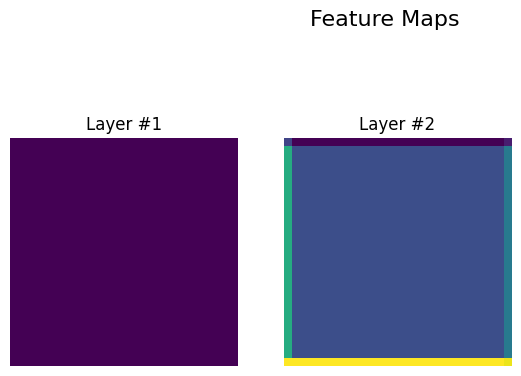

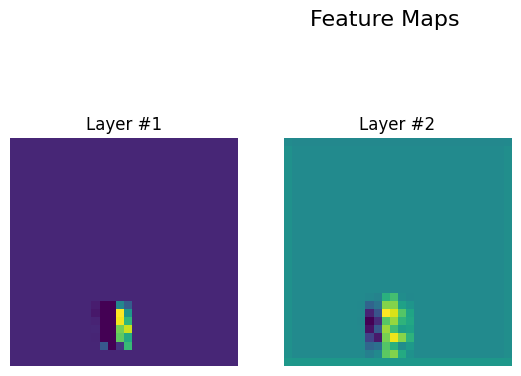

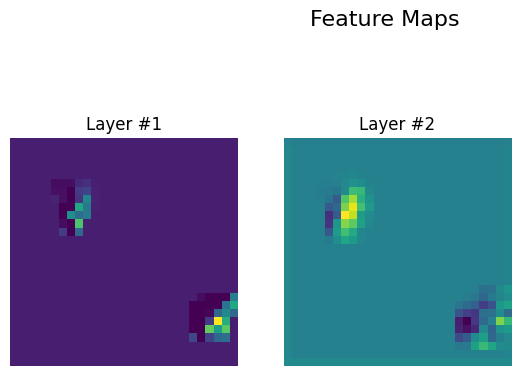

Acc =  0.99278235
Loss =  0.029838605
Acc =  0.98736703
Loss =  0.046598002


In [9]:
config_model['task'] = 'classification'
config_model['in_channels'] = 1
config_model['ConvLayers'] = [32, 10]
config_model['FCLayers'] = [10*28*28, 512, 4]
config_model['kernel_size'] = [3, 3, 3]
config_model['strides'] = [1, 1, 1]
config_model['pool'] = None
config_model['activation'] = 'relu'
config_model['dropout'] = 0.5

model = cnn.CNN(config_model)

config_trainer['model'] = model
config_trainer['loss'] = 'cross_entropy'
config_trainer['epochs'] = 10
config_trainer['batch_size'] = 64
config_trainer['learning_rate'] = 0.001
config_trainer['optimizer'] = optim.Adam(model.parameters(), lr=config_trainer['learning_rate'])
config_trainer['wandb'] = False
config_trainer['labels'] = dataloader.getLabels('num_digits')
config_trainer['labelsRnum'] = True
config_trainer['FM_Vis'] = True

trainer = cnn.Model_trainer(config_trainer)
trainer.trainer(dataloader._train_images, dataloader._train_labels, dataloader._valid_images, dataloader._valid_labels, 10)
# trainer.evaluate(dataloader._test_images, dataloader._test_labels, True)

### Regression

Epoch:  0


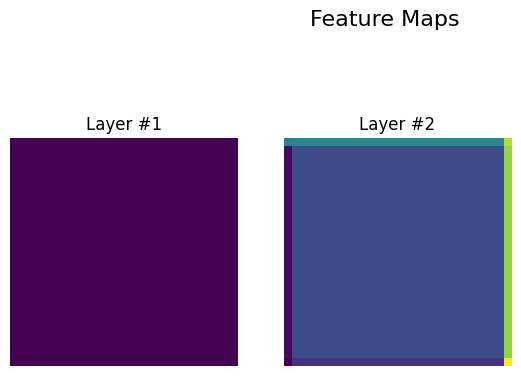

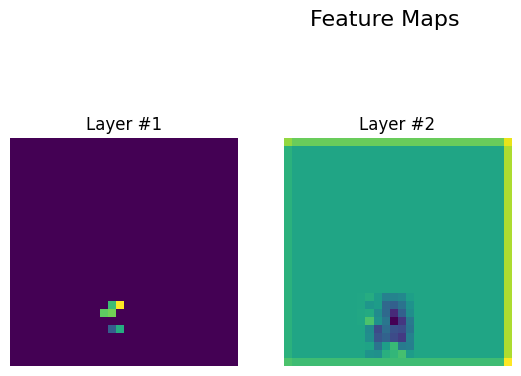

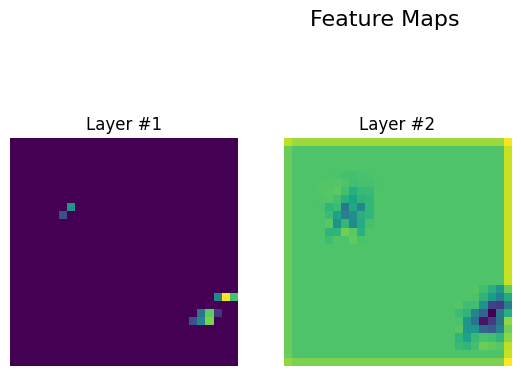

Acc =  0.5580584
Loss =  0.44281146
Acc =  0.5930851
Loss =  0.39353985
Epoch:  1


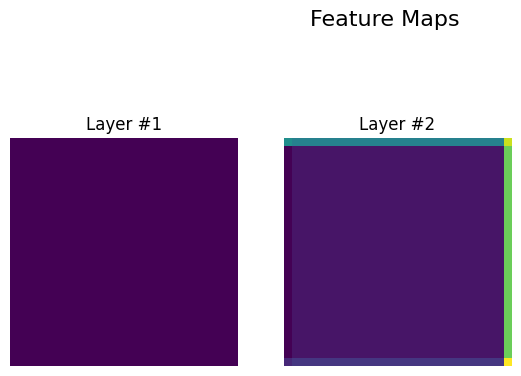

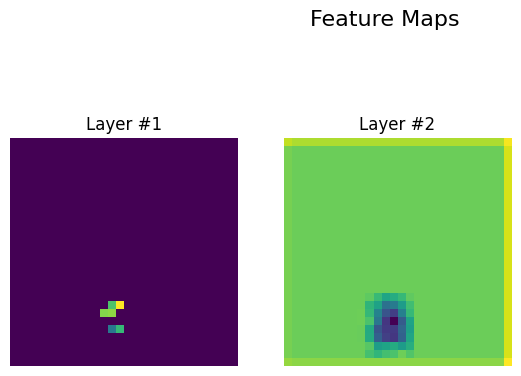

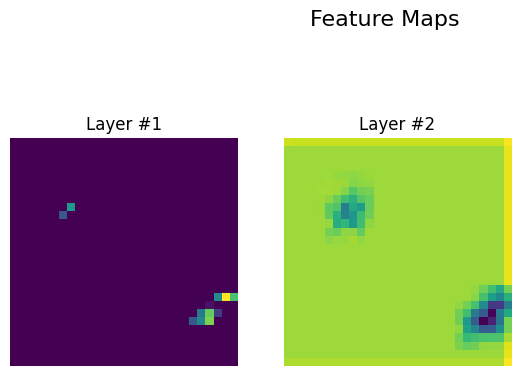

Acc =  0.56270397
Loss =  0.5128908
Acc =  0.5823518
Loss =  0.42462945
Epoch:  2


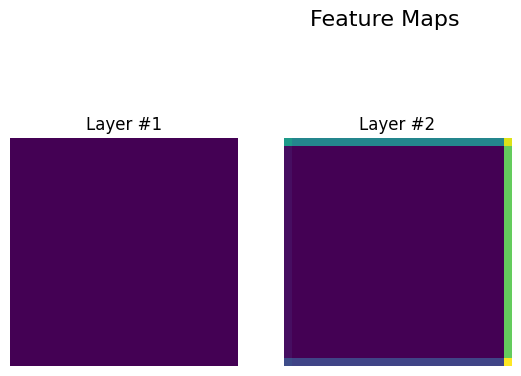

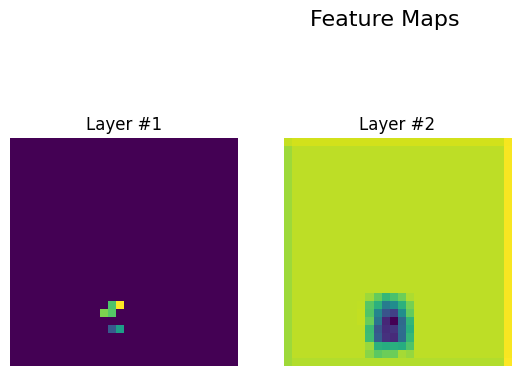

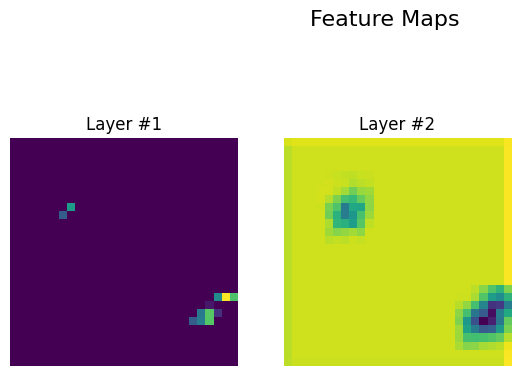

Acc =  0.593478
Loss =  0.4396322
Acc =  0.62799203
Loss =  0.35872158
Epoch:  3


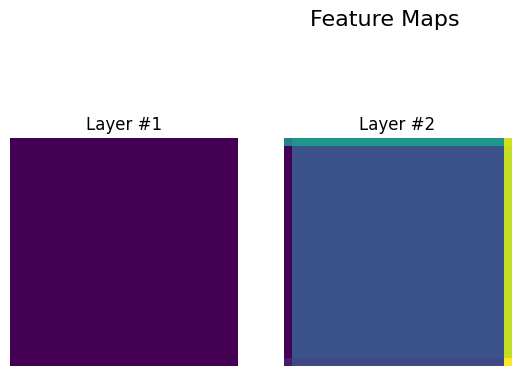

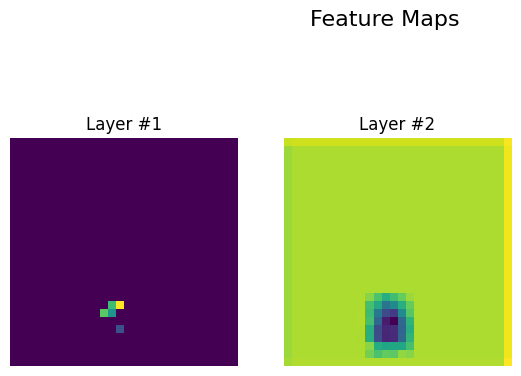

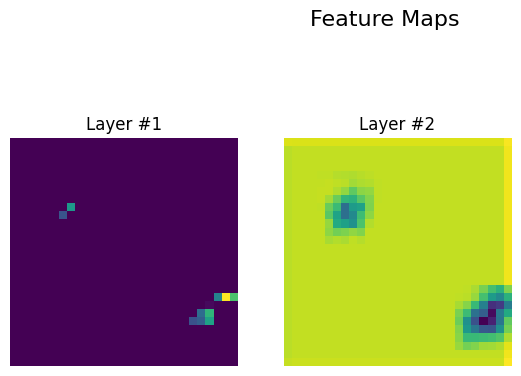

Acc =  0.6260877
Loss =  0.37574175
Acc =  0.6551102
Loss =  0.3063569
Epoch:  4


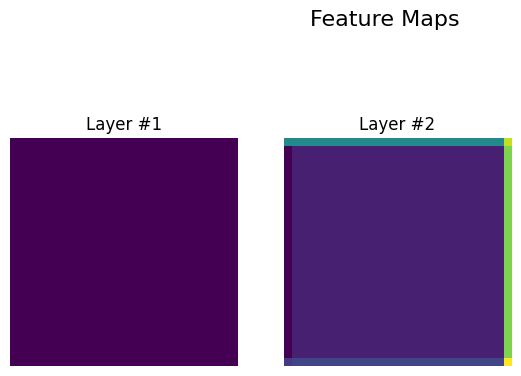

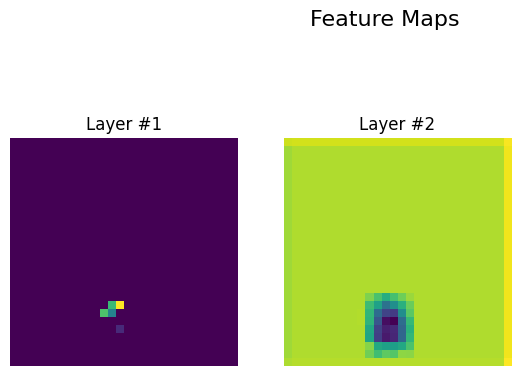

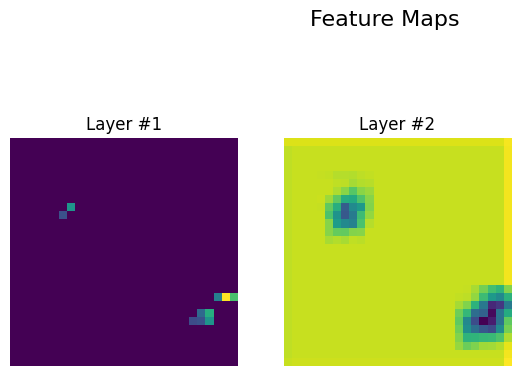

Acc =  0.69244015
Loss =  0.23161718
Acc =  0.7446808
Loss =  0.19769742
Epoch:  5


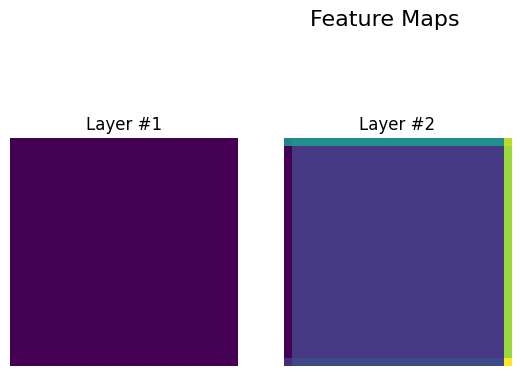

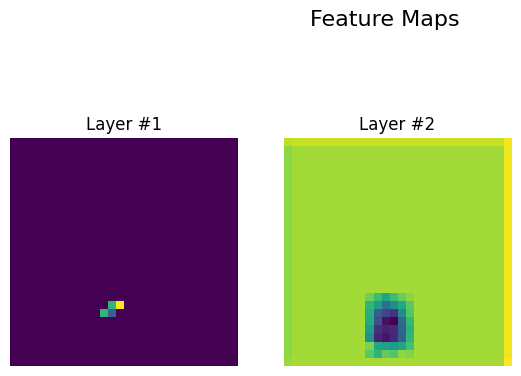

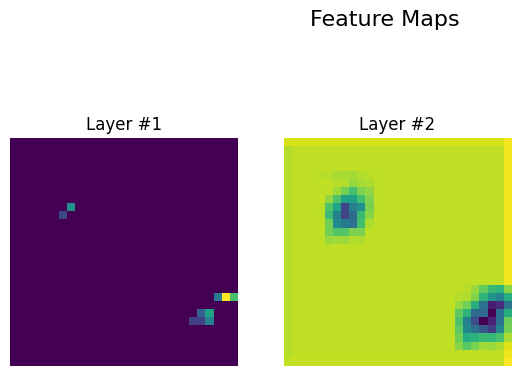

Acc =  0.67262286
Loss =  0.3037104
Acc =  0.70388484
Loss =  0.2655011
Epoch:  6


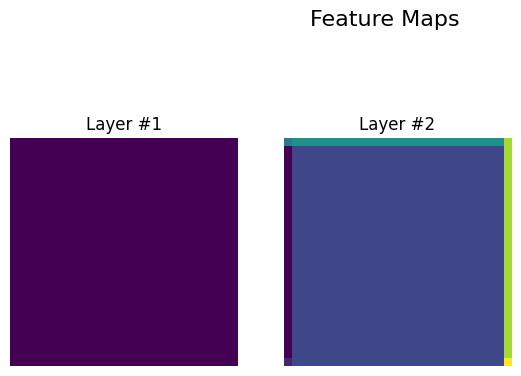

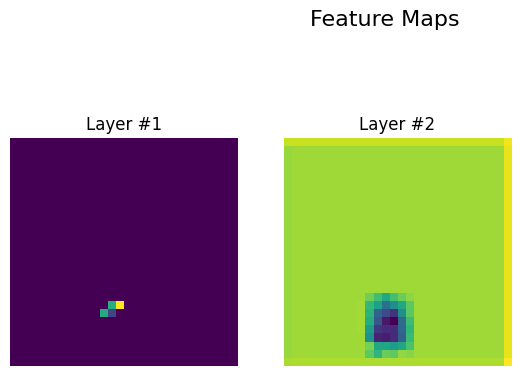

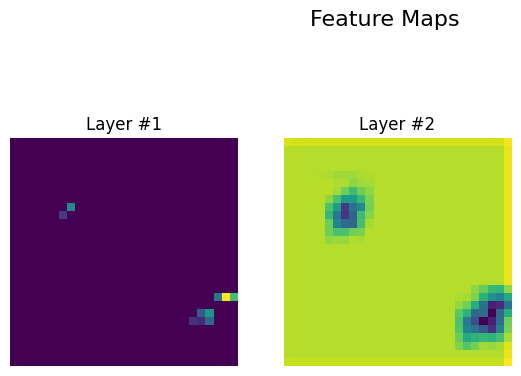

Acc =  0.7215147
Loss =  0.2191877
Acc =  0.7577412
Loss =  0.19346738
Epoch:  7


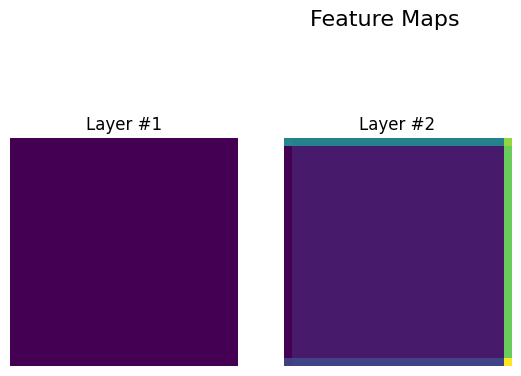

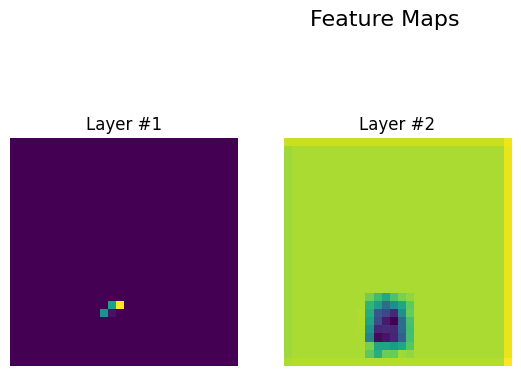

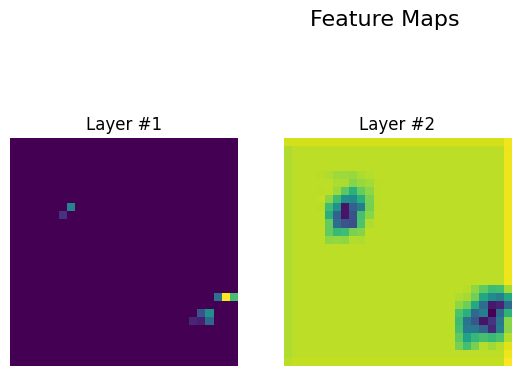

Acc =  0.72727066
Loss =  0.21405658
Acc =  0.7525171
Loss =  0.1954324
Epoch:  8


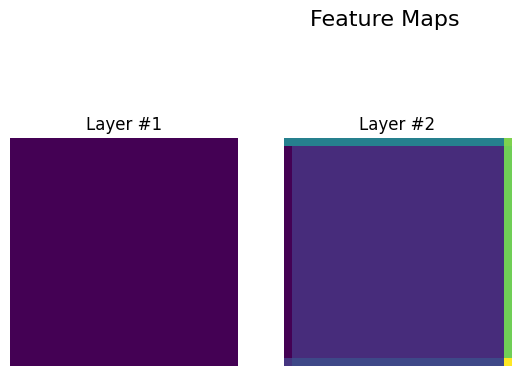

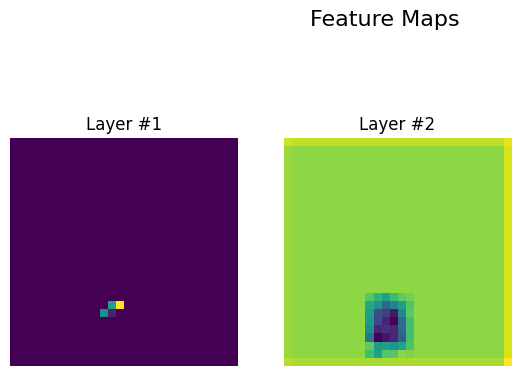

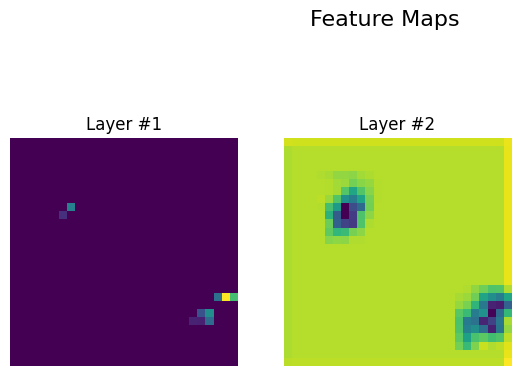

Acc =  0.7638348
Loss =  0.17144619
Acc =  0.79093844
Loss =  0.1603745
Epoch:  9


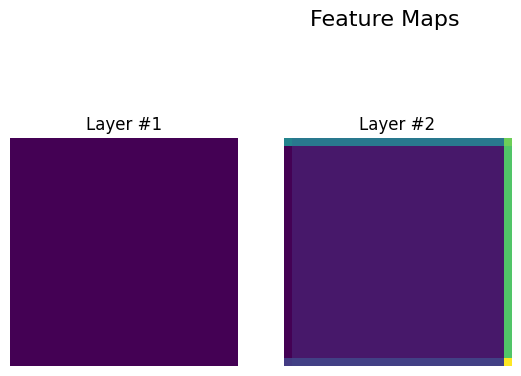

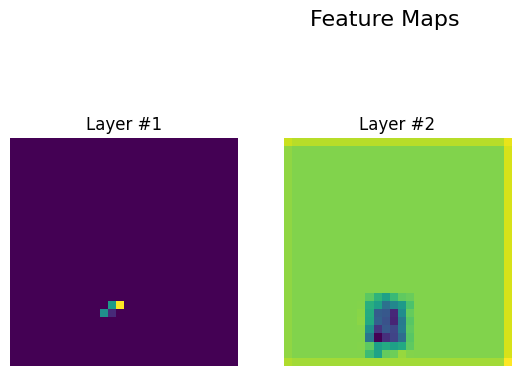

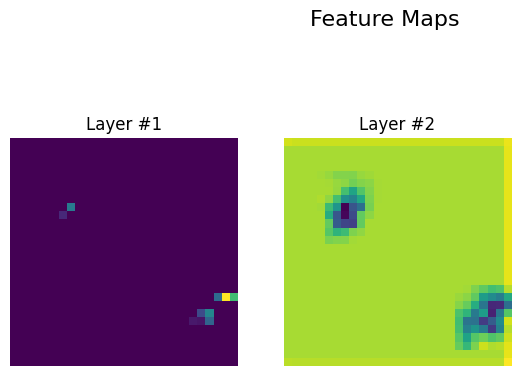

Acc =  0.69692713
Loss =  0.23866086
Acc =  0.7364172
Loss =  0.21350132


In [10]:
config_model['task'] = 'regression'
config_model['in_channels'] = 1
config_model['ConvLayers'] = [32, 10]
config_model['FCLayers'] = [10*28*28, 512, 1]
config_model['kernel_size'] = [3, 3, 3]
config_model['strides'] = [1, 1, 1]
config_model['pool'] = None
config_model['activation'] = 'relu'
config_model['dropout'] = 0.5

model = cnn.CNN(config_model)

config_trainer['model'] = model
config_trainer['loss'] = 'MSE'
config_trainer['epochs'] = 10
config_trainer['batch_size'] = 64
config_trainer['learning_rate'] = 0.001
config_trainer['optimizer'] = optim.Adam(model.parameters(), lr=config_trainer['learning_rate'])
config_trainer['wandb'] = False
config_trainer['labels'] = dataloader.getLabels('num_digits')
config_trainer['labelsRnum'] = True
config_trainer['FM_Vis'] = True

trainer = cnn.Model_trainer(config_trainer)
trainer.trainer(dataloader._train_images, dataloader._train_labels, dataloader._valid_images, dataloader._valid_labels, 10)

## Multilabel Classification - Task 3

## Data loading and preprocessing

In [ ]:
dataloader_multi = MultiMNISTDataset(32)
dataloader_multi.load_mnist_data('multi_label')
dataloader_multi.getLabels('multi_label')